<a href="https://colab.research.google.com/github/kunikagupta27/Topic-Modelling-on-News-Article/blob/main/Topic_Modelling_on_News_Article.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - Topic Modelling on BBC News Articles**

### **Business Context** 

In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

### **Dataset Description** 

The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available. Main Libraries used: Pandas for data manipulation, aggregation Matplotlib and Seaborn for visualization and behavior with respect to the target variable • NumPy for computationally efficient operations

BBC stands for British Broadcasting Corporation.

It is an operational business division of the British Broadcasting Corporation (BBC) responsible for the gathering and broadcasting of news and current affairs in the UK and around the world. The department is the world's largest broadcast news organisation and generates about 120 hours of radio and television output each day, as well as online news coverage.

The service maintains 50 foreign news bureaus with more than 250 correspondents around the world.

BBC News Online is the BBC's news website. It is one of the most popular news websites in the UK, reaching over a quarter of the UK's internet users, and worldwide, with around 14 million global readers every month.

The website contains international news coverage as well as articles based on entertainment, sport, science, and political news.

# **Objective**

In this project the task is to identify major themes/topics across a collection of BBC news articles.

In [1]:
# Importing Neccessary Modules

# importing os module
import os

# importing CountVectorizer for feature extraction
from sklearn.feature_extraction.text import CountVectorizer

# Importing data manipulation libraries
import numpy as np
import pandas as pd

# importing tqdm and display modules for progress meters/bars
from IPython.display import display
from tqdm import tqdm

# importing wordcloud to represent topics wordcloud
from wordcloud import WordCloud

# Model selection modules
from sklearn.model_selection import GridSearchCV

# Importing Counter
from collections import Counter

# import ast(abstract syntax tree)
import ast

# importing data visualization modules
import matplotlib.pyplot as plt
import seaborn as sns

# importing mlab for implementing MATLAB functions
import matplotlib.mlab as mlab

# importing statistics module
import scipy.stats as stats

# importing TSNE for data exploration and visualizing high-dimensional data
from sklearn.manifold import TSNE

# importing decomposition modules
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation

# importing Natural Language Toolkit and other NLP modules
import nltk
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob, Word

# importing countVectorizer for text vectorization
from sklearn.feature_extraction.text import CountVectorizer

# Importing warnings library. The warnings module handles warnings in Python.
import warnings
warnings.filterwarnings('ignore')

# **Data Gathering and Discovery**

Now we'll gather the data files and perform some basic operations to understand the data and how we can process it to improve the model performance. We will also apply some basic EDA to better understand the data.

In [2]:
# Mounting the Google Drive to access data.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Note:- The dataset in this case isn't collective, its been stored in form of numerous text files sub-categorized in 5 different domains. Hence, for loading the data we'll visit all text files individually and copy all articles to a dataframe along with their category.

In [3]:
# The variable "directory" holds the address of text files stored in drive
directory = '/content/drive/MyDrive/Topic Modelling Capstone/Topic Modelling Capstone'

# All 5 sub-categories provided
subdirs = ['business', 'entertainment', 'politics', 'sport', 'tech']

# Create dataframe for gathering the articles
bbc = pd.DataFrame()
 
# Iterate over sub-directories to access the text files
for subdir in subdirs:

  # address to the subdirectory
  dir = directory + '/' + subdir

  # Iterate over all the text files present in a sub-directory
  for filename in os.listdir(dir):
    
    # Get file address
    filepath = os.path.join(dir, filename)

    # Traversing over text files and storing the articles into the dataframe
    try:
      data = open(filepath,'r').read()

      # escape characters to be ignored in the text
      escape = ['\n']
      
      # removing escape characters from text
      for elem in escape:
        data = data.replace(elem, ' ')
      
      # Storing article to the dataframe
      dict1 = {'Filename': filename.split('.')[0], 'Contents': data.lower(), 'Category':subdir}
      bbc = bbc.append(dict1, ignore_index=True, verify_integrity = True)

    # Ignore exception, if any
    except:
      pass

The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. There are over 2000 news article available in these categories.

Note:- There was a particular file in this dataset which was formatted differently from the rest of the files, hence while reading the data, the text formatting was throwing an exception. For such case we have neglected the file altogether, since the case was relevant to only a single file.

In [4]:
# Display dataframe

bbc

,Filename,Contents,Category
0,012,indonesians face fuel price rise indonesia's ...,business
1,005,pernod takeover talk lifts domecq shares in u...,business
2,011,ask jeeves tips online ad revival ask jeeves ...,business
3,001,ad sales boost time warner profit quarterly p...,business
4,025,yukos loses us bankruptcy battle a judge has ...,business
...,...,...,...
2219,373,software watching while you work software tha...,tech
2220,337,can yahoo dominate next decade? yahoo has rea...,tech
2221,387,progress on new internet domains by early 200...,tech
2222,334,security warning over 'fbi virus' the us fede...,tech


The dataset consists of the following attributes:

● Index: Entry index.

● FileName: Destination File name/number.

● Contents: Complete transcript of a article, this contains all the textual data present in the destination file for a particular entry.

● Category: Theme/domain of a article.

In [5]:
# Size of dataset
bbc.shape

(2224, 3)

Now, lets check if a particular article is being stored more than once into the dataframe. Having duplicates in our data would cause inconsistencies in results.

In [6]:
# Checking for duplicate rows
bbc[bbc.duplicated(subset = "Contents")]

,Filename,Contents,Category
223,253,jobs growth still slow in the us the us creat...,business
236,240,economy 'strong' in election year uk business...,business
347,356,s korea spending boost to economy south korea...,business
357,333,troubled marsh under sec scrutiny the us stoc...,business
368,371,singapore growth at 8.1% in 2004 singapore's ...,business
...,...,...,...
2215,382,tough rules for ringtone sellers firms that f...,tech
2219,373,software watching while you work software tha...,tech
2221,387,progress on new internet domains by early 200...,tech
2222,334,security warning over 'fbi virus' the us fede...,tech


We can see there are 99 duplicate rows, it resembles that these articles are present more than once, we need to drop such rows before we proceed further with the model development.

In [7]:
# Dropping duplicate entries
bbc = bbc.drop_duplicates(subset=['Contents'], keep='first')
bbc

,Filename,Contents,Category
0,012,indonesians face fuel price rise indonesia's ...,business
1,005,pernod takeover talk lifts domecq shares in u...,business
2,011,ask jeeves tips online ad revival ask jeeves ...,business
3,001,ad sales boost time warner profit quarterly p...,business
4,025,yukos loses us bankruptcy battle a judge has ...,business
...,...,...,...
2214,362,bad e-mail habits sustains spam the 'bad beha...,tech
2216,378,mobile tv tipped as one to watch scandinavian...,tech
2217,363,sony psp handheld console hits us the latest ...,tech
2218,341,sony psp tipped as a 'must-have' sony's plays...,tech


In [8]:
# Size of dataset after removing duplicates
bbc.shape

(2125, 3)

# **Categories**

Now, lets see how many articles are there across all 5 categories.

In [9]:
# Grouping rows based on categories and counting number of entries
df = bbc.groupby(['Category'])['Category'].count()
df

Category
business         503
entertainment    369
politics         403
sport            503
tech             347
Name: Category, dtype: int64

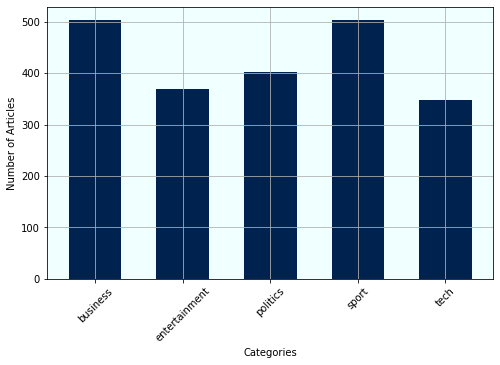

In [10]:
# Plotting a bar graph to represent all categories and number of articles in them 
df.plot(x = "Category", kind = "bar", 
        figsize=(8,5), grid = True,
        xlabel = "Categories",
        ylabel = "Number of Articles",
        colormap= "cividis", width = 0.6, 
        rot = 45).patch.set_facecolor('#f0ffff')

We can see that Business and Sports category have the highest number of articles, while for Tech category the number is quite low. Number of articles will play a major role in determining the topics in them. Larger the number of articles for a category, higher will be the result satisfaction for the model.

# **Contents**

Reindexing the data and extracting just the contents of the article i.e, the complete transcript of the article.

In [11]:
# Reindexing the data
reindexed_data = bbc.reset_index()

# Extracting contents of all articles
reindexed_data = reindexed_data["Contents"]

# Display 
reindexed_data

0       indonesians face fuel price rise  indonesia's ...
1       pernod takeover talk lifts domecq  shares in u...
2       ask jeeves tips online ad revival  ask jeeves ...
3       ad sales boost time warner profit  quarterly p...
4       yukos loses us bankruptcy battle  a judge has ...
                              ...                        
2120    bad e-mail habits sustains spam  the 'bad beha...
2121    mobile tv tipped as one to watch  scandinavian...
2122    sony psp handheld console hits us  the latest ...
2123    sony psp tipped as a 'must-have'  sony's plays...
2124    can yahoo dominate next decade?  yahoo has rea...
Name: Contents, Length: 2125, dtype: object

As we can see the above dataset has got the complete set of articles, now we can use this dataset to count the top words with highest frequencies using CountVectorizer.

### **CountVectorizer (Top Words)**

In order to use textual data for predictive modeling, the text must be parsed to remove certain words – this process is called Tokenization.

These words then need to be encoded as integers, or floating-point values, such that they can be used as inputs in machine learning algorithms. This process is called Feature Extraction (or Vectorization).

Scikit-learn’s CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

CountVectorizer creates a matrix in which each unique word is represented by a column of the matrix, and each text sample from the document is a row in the matrix. The value of each cell is nothing but the count of the word in that particular text sample.

Now that we know what CountVectorizer is, its time we implement it to gather the top-most occuring words in out dataset.

In [12]:
# Function to extract top n words with highest frequency
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    The function returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample as inputs
    '''
    # encoding the document using countvectorizer object
    vectorized_content = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_content, axis=0)

    # extracting specifics for words
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)

    # creating a vector matrix for words
    word_vectors = np.zeros((n_top_words, vectorized_content.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    # display Vector matrix
    print(word_vectors)

    # collect the words
    words = [word[0].encode('ascii').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

**Removing Stopwords using NLTK (Natural Language Toolkit)**

**Stop Words:** A stop word is a commonly used word (such as “the”, “a”, “an”, “in”). Since these words occur a lot, a search engine has to be programmed to ignore them. We can easily remove them by storing a list of words that we consider to be stop words.

**NLTK(Natural Language Toolkit)** in python has a list of stopwords stored in 16 different languages. Hence we'll use it to extract our data without all such words.

In [13]:
# dowloading nltk stopwords module
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

We know that all of our articles are in english language, hence we'll only require stopwords in english.

In [14]:
# extracting all stopwords for english language
stpwrd = nltk.corpus.stopwords.words('english')

# list of stopwords in english language
stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Now lets implement our countvectorizer to extract top words with highest frequencies.**

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


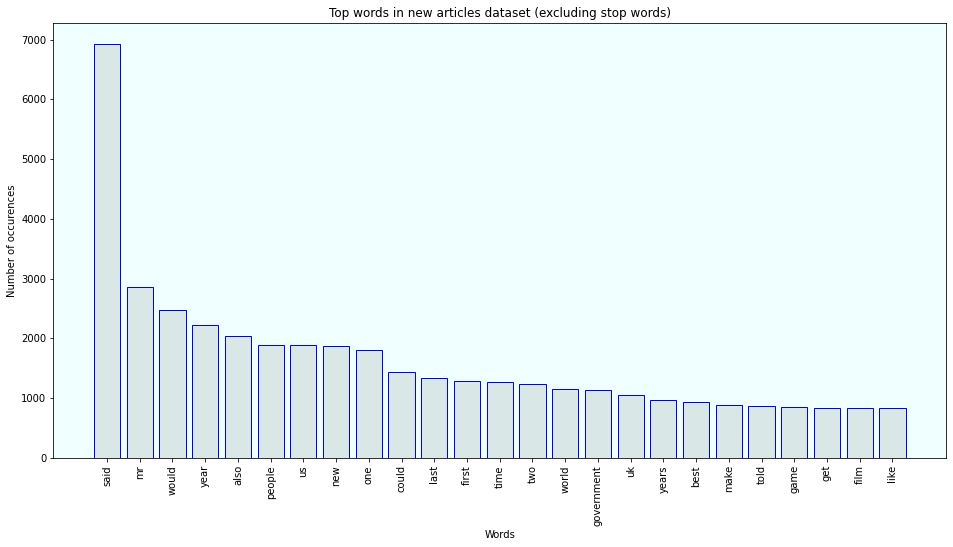

In [15]:
# creating vectorizer object
count_vectorizer = CountVectorizer(stop_words=stpwrd)

# calling the function to get words and their counts
words, word_values = get_top_n_words(n_top_words=25,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=reindexed_data)

# display top 25 words using bar plot
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
ax.set_xticks(range(len(words)))
ax.set_xticklabels(words, rotation='vertical')
ax.set_title('Top words in new articles dataset (excluding stop words)')
ax.set_xlabel('Words')
ax.set_ylabel('Number of occurences')
ax.patch.set_facecolor('#f0ffff')
plt.show()

**Observations:**

We can see some commonly used words like "said", "mr", "would" etc, are on top, which makes sense because no matter what the subject of a article is, these words help build up a sentence and hence the excessive use is inevitable.

However, we can also find a few words relevant to the categories of our articles. For example, 'UK' and 'US'(since we converted all words to lower case, 'us' represents US too) both are country names which could reflect to any of the categories. Also words like 'government' could reflect in articles related to Politics, Business, Tech etc.

The words like 'film' and 'game' sounds relevant to the entertainment category.

# **Stemming/Lemmatizing the data**

**Stemming:** is the process of reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words known as a lemma. Stemming is important in natural language understanding (NLU) and natural language processing (NLP).

**Lemmatization:** This algorithm collects all inflected forms of a word in order to break them down to their root dictionary form or lemma. Words are broken down into a part of speech (the categories of word types) by way of the rules of grammar.

In [16]:
# contents of articles
reindexed_data

0       indonesians face fuel price rise  indonesia's ...
1       pernod takeover talk lifts domecq  shares in u...
2       ask jeeves tips online ad revival  ask jeeves ...
3       ad sales boost time warner profit  quarterly p...
4       yukos loses us bankruptcy battle  a judge has ...
                              ...                        
2120    bad e-mail habits sustains spam  the 'bad beha...
2121    mobile tv tipped as one to watch  scandinavian...
2122    sony psp handheld console hits us  the latest ...
2123    sony psp tipped as a 'must-have'  sony's plays...
2124    can yahoo dominate next decade?  yahoo has rea...
Name: Contents, Length: 2125, dtype: object

In [17]:
# downloading wordNet lemmatizer
nltk.download(['wordnet','omw-1.4'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
